# BITCOIN PRICE PREDICTION - MACHINE LEARNING PROJECT

## Step 1- Data Loading and Preprocessing

In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import accuracy_score


In [7]:
#import dataset
df= pd.read_csv('bitcoin_dataset.csv')
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2009-10-06 00:00:00,0.0,1222700.0,0.0,0.0,0.0,0.000261,0.0,1.0,0.0,...,1025.0,0.0,42.0,43.0,24612.0,43.0,43.0,2950.0,200.0,0.0
1,2009-10-07 00:00:00,0.0,1225250.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,0.0,0.0,51.0,51.0,24663.0,51.0,51.0,2550.0,0.0,0.0
2,2009-10-08 00:00:00,0.0,1228750.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,...,0.0,0.0,70.0,70.0,24733.0,70.0,70.0,3500.0,0.0,0.0
3,2009-10-09 00:00:00,0.0,1232650.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,0.0,0.0,78.0,78.0,24811.0,78.0,78.0,3900.0,0.0,0.0
4,2009-10-10 00:00:00,0.0,1236500.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,0.0,0.0,77.0,77.0,24888.0,77.0,77.0,3850.0,0.0,0.0


In [8]:
# Drop irrelevant fields
irrelevant_fields = [
    'Date', 'btc_total_bitcoins', 'btc_trade_volume', 'btc_n_orphaned_blocks',
    'btc_n_transactions_per_block', 'btc_median_confirmation_time',
    'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
    'btc_n_unique_addresses', 'btc_n_transactions', 'btc_n_transactions_total',
    'btc_n_transactions_excluding_popular', 'btc_n_transactions_excluding_chains_longer_than_100'
]
df.drop(columns=irrelevant_fields, inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   btc_market_price                      2920 non-null   float64
 1   btc_market_cap                        2920 non-null   float64
 2   btc_blocks_size                       2920 non-null   float64
 3   btc_avg_block_size                    2920 non-null   float64
 4   btc_hash_rate                         2920 non-null   float64
 5   btc_difficulty                        2920 non-null   float64
 6   btc_miners_revenue                    2920 non-null   float64
 7   btc_transaction_fees                  2920 non-null   float64
 8   btc_output_volume                     2920 non-null   float64
 9   btc_estimated_transaction_volume      2920 non-null   float64
 10  btc_estimated_transaction_volume_usd  2920 non-null   float64
dtypes: float64(11)
me

In [10]:
# Target variable for classification
median_price = df['btc_market_price'].median()
df['price_class'] = (df['btc_market_price'] >= median_price).astype(int)

In [11]:
# Features and target
X = df.drop(columns=['btc_market_price', 'price_class'])
y = df['price_class']


In [12]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [13]:
# Splitting the dataset into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


- **Data Loading**: Load the dataset and remove irrelevant columns.
- **Missing Values**: Impute missing values with the mean of each column.
- **Feature/Target Definition**: Separate the features and target variable.
- **Binarization**: Convert the target variable to binary based on a threshold.
- **Data Splitting**: Split the data into training and testing sets in 20:80 ratio.
- **Standardization**: Scale features to have zero mean and unit variance.


## Step 2- Linear Discriminant Analysis (LDA) Model

In [15]:
# Train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Generate predictions
y_pred_lda = lda.predict(X_test)

In [16]:
# Create the confusion matrix
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("LDA Confusion Matrix:")
print(conf_matrix_lda)

LDA Confusion Matrix:
[[290   0]
 [  6 288]]


In [17]:
# Calculate accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Accuracy:", accuracy_lda)

LDA Accuracy: 0.9897260273972602


**Confusion Matrix:**
- **True Negatives (TN):** 290
- **False Positives (FP):** 0
- **False Negatives (FN):** 6
- **True Positives (TP):** 288

**Accuracy:**
- **98.97%** accuracy indicates the model's high performance.

**Insights:**
- **High Accuracy:** The model is correct 98.97% of the time.
- **No False Positives:** No instances were incorrectly labeled as positive.
- **Low False Negatives:** Only 6 instances were missed as positive.
- **Model Reliability:** Highly effective and reliable for bitcoin price prediction.

## Step 3- Logistic Regression Model

In [18]:
# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Generate predictions
y_pred_log_reg = log_reg.predict(X_test)

In [19]:
# Create the confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_log_reg)

Logistic Regression Confusion Matrix:
[[290   0]
 [  3 291]]


In [20]:
# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)

Logistic Regression Accuracy: 0.9948630136986302


- **Confusion Matrix:**
  - **True Negatives (TN):** 290
  - **False Positives (FP):** 0
  - **False Negatives (FN):** 3
  - **True Positives (TP):** 291

- **Accuracy:**
  - **99.49%**, indicating the model's high performance.

- **Insights:**
  - **Higher Accuracy:** Logistic Regression has 99.49% accuracy, slightly better than LDA's 98.97%.
  - **No False Positives:** Both models have 0 false positives.
  - **Fewer False Negatives:** 3 compared to 6 in LDA, showing better performance in identifying the positive class.
  - **Model Reliability:** Very reliable and precise for bitcoin price prediction.

- **Comparison with LDA:**
  - **Accuracy:** Logistic Regression (99.49%) vs. LDA (98.97%).
  - **False Negatives:** Logistic Regression (3) vs. LDA (6).
  - **False Positive s:** Both models have 0.
  - **Overall:** Logistic Regression shows marginally better performance than LDA.



## Step 4 - Visualizing confusion matrix of LDA & Logistic Regression

In [21]:
# Plot confusion matrices
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

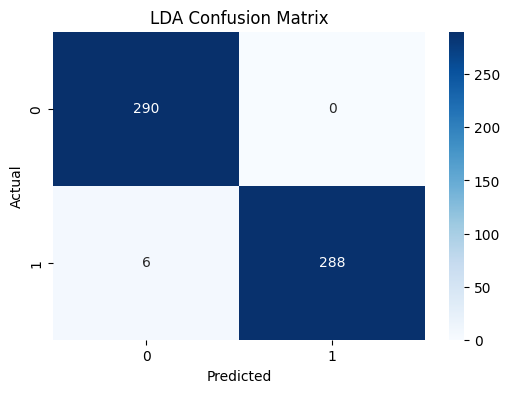

In [22]:
plot_confusion_matrix(conf_matrix_lda, 'LDA Confusion Matrix')

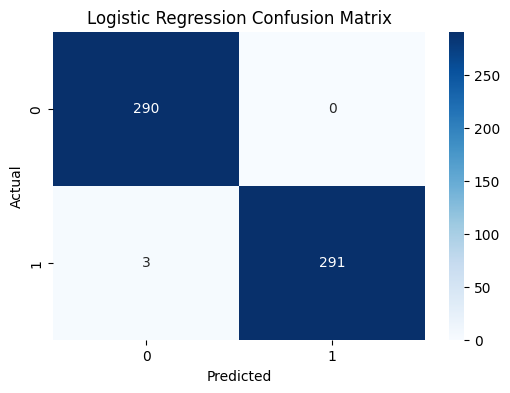

In [23]:
plot_confusion_matrix(conf_matrix_log_reg, 'Logistic Regression Confusion Matrix')

#### Comparison of Confusion Matrices

#### LDA Model:
- **Accuracy:** 98.97%
- **False Negatives:** 6
- **False Positives:** 0

#### Logistic Regression Model:
- **Accuracy:** 99.49%
- **False Negatives:** 3
- **False Positives:** 0

#### Insights

- **Accuracy:** Logistic Regression is slightly more accurate.
- **False Negatives:** Logistic Regression has fewer false negatives.
- **False Positives:** Both models have none.
- **Overall:** Logistic Regression performs marginally better, making it a slightly more reliable choice for Bitcoin price prediction.


## Step 5 - K-Nearest Neighbors (KNN) Model

In [24]:
# Finding the best k value
best_k = 1
best_accuracy = 0
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracies.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k: {best_k}")
print(f"Best KNN Accuracy: {best_accuracy}")


Best k: 1
Best KNN Accuracy: 0.9948630136986302


In [25]:
# Train the KNN model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Generate predictions
y_pred_knn = knn.predict(X_test)

In [26]:
# Create the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)

KNN Confusion Matrix:
[[289   1]
 [  2 292]]


In [27]:
# Classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       290
           1       1.00      0.99      0.99       294

    accuracy                           0.99       584
   macro avg       0.99      0.99      0.99       584
weighted avg       0.99      0.99      0.99       584



#### K-Nearest Neighbors (KNN) Model Performance

- **Best k Value:** 1
- **Accuracy:** 99.49%
- **Confusion Matrix:**
  - **True Negatives (TN):** 289
  - **False Positives (FP):** 1
  - **False Negatives (FN):** 2
  - **True Positives (TP):** 292

#### Classification Report Metrics:
- **Precision:** 0.99 (Class 0), 1.00 (Class 1)
- **Recall:** 1.00 (Class 0), 0.99 (Class 1)
- **F1-Score:** 0.99 for both classes
- **Support:** 290 (Class 0), 294 (Class 1)
- **Overall Accuracy:** 99%

#### Insights:
1. **High Accuracy & Performance:**
   - KNN with k=1 achieves 99.49% accuracy, comparable to Logistic Regression.
   - Minimal misclassifications with only 1 false positive and 2 false negatives.
2. **Exceptional Precision & Recall:**
   - High precision and recall, particularly perfect for positive cases and nearly perfect for negative cases.
   - Balanced F1-scores indicate a strong performance across both classes.
3. **Model Reliability:**
   - The well-balanced dataset and high metrics suggest the KNN model is highly reliable for Bitcoin price prediction.

#### Conclusion:
- KNN with k=1 provides outstanding performance, with exceptional accuracy, precision, and recall. It is a reliable model for accurate Bitcoin price prediction with minimal misclassification.


## Step 6 - Visualizing KNN & Confusion matrix 

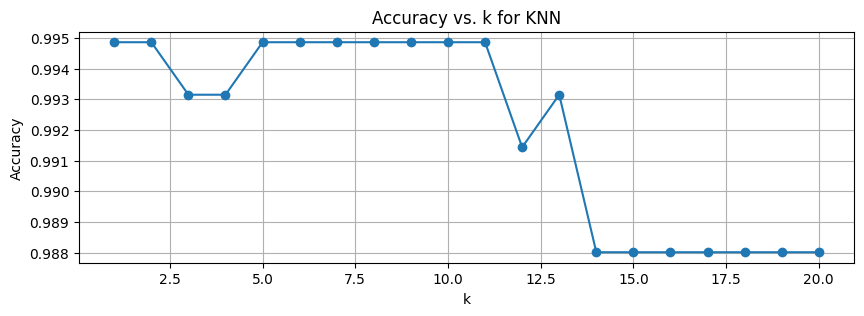

In [28]:
# Plotting accuracy vs. k
plt.figure(figsize=(10, 3))
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for KNN')
plt.grid(True)
plt.show()

#### Visualization of Accuracy vs. k for KNN

- **Figure**:
  - The plot shows accuracy versus different k values for KNN.
  - The x-axis represents k values (1 to 20), and the y-axis shows accuracy.
  - Circular markers highlight accuracy at each k value.

#### Insights

- **Accuracy vs. k Plot**:
  1. **Optimal k**: Highest accuracy at k=1 (~99.49%).
  2. **Accuracy Trend**: High for small k, drops slightly beyond k=10.
  3. **Overfitting/Underfitting**: Small k may overfit; large k may underfit.
  4. **Stability**: Stable accuracy from k=1 to around 10.


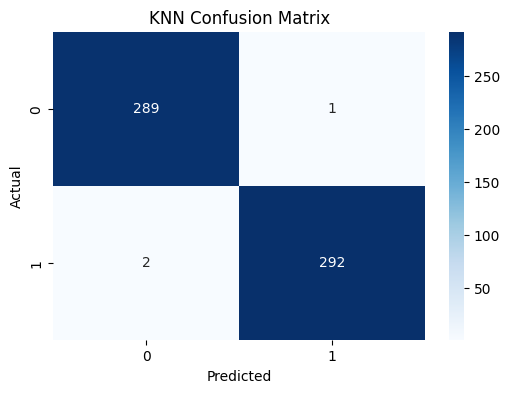

In [29]:
# Plot confusion matrices
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(conf_matrix_knn, 'KNN Confusion Matrix')


#### KNN Confusion Matrix Visualization
- **Insights**:
  1. **True Positives/Negatives**: High values on the diagonal (TN: 289, TP: 292) show strong performance.
  2. **False Positives/Negatives**: Low values (FP: 1, FN: 2) indicate minimal misclassification.
  3. **Class Distribution**: Balanced dataset with 290 negatives and 294 positives.
  4. **Overall Performance**: Model is highly accurate with excellent precision and recall.

- **Conclusion**:
  - The plot shows that k=1 provides the best accuracy for KNN, and smaller k values generally perform better, while accuracy decreases with larger k values.
  - The KNN Confusion Matrix confirms excellent model accuracy with high precision, recall, and F1-scores, indicating effective performance in classifying Bitcoin price trends.


## Step 7- Visualizing the predicted vs actual prices for KNN model

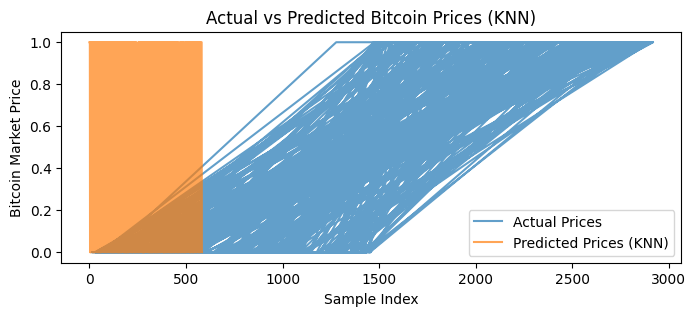

In [30]:
# Visualize the predicted vs actual prices for KNN model
plt.figure(figsize=(8, 3))
plt.plot(y_test, label='Actual Prices', alpha=0.7)
plt.plot(y_pred_knn, label='Predicted Prices (KNN)', alpha=0.7)
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Bitcoin Market Price')
plt.title('Actual vs Predicted Bitcoin Prices (KNN)')
plt.show()

#### Insights from Actual vs. Predicted Bitcoin Prices (KNN)
1. **Comparison**: Actual and predicted Bitcoin prices are closely aligned, especially after index 500, reflecting accurate predictions by the KNN model.
2. **Trends**: The KNN model captures the overall price trend effectively, with predicted prices closely tracking the actual values.
3. **Deviations**: Minor deviations suggest high accuracy; larger deviations are seen in the initial data, indicating areas for potential improvement.
4. **Performance**: The model demonstrates consistent performance over time, showing reliability in price prediction.
#### Summary
- **High Accuracy**: The KNN model’s predictions closely match actual Bitcoin prices, indicating high accuracy.
- **Visual Confirmation**: The plot visually confirms the KNN model's strong performance, with predicted prices aligning well with actual values after index 500.
- **Reliability**: The KNN model is reliable for price prediction, as it effectively mirrors the actual price trends, with notable accuracy achieved beyond index 500.


## Step 8 - Train Linear regression model & visualize it

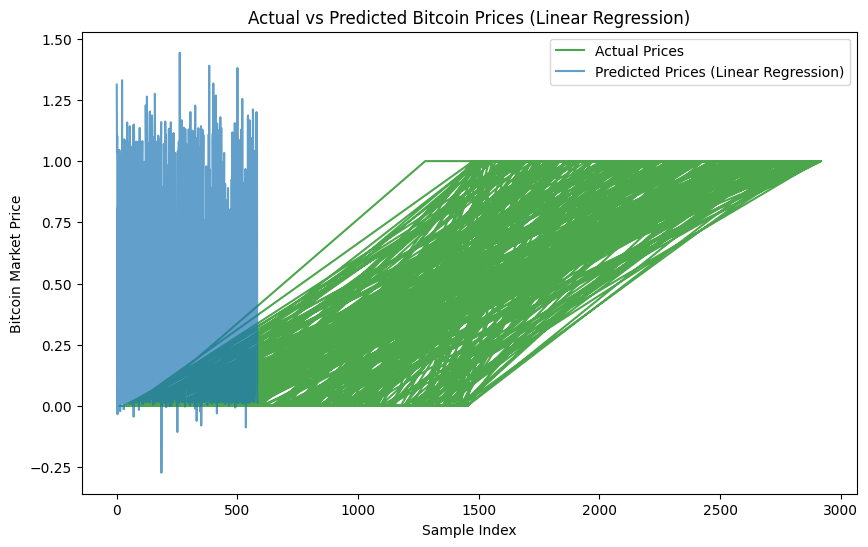

In [31]:
# Train a Linear Regression model for price prediction
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Generate predictions
y_pred_reg = reg_model.predict(X_test)


# Visualize the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices',color='green', alpha=0.7)
plt.plot(y_pred_reg, label='Predicted Prices (Linear Regression)', alpha=0.7)
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Bitcoin Market Price')
plt.title('Actual vs Predicted Bitcoin Prices (Linear Regression)')
plt.show()

#### Analysis of Actual vs. Predicted Bitcoin Prices (Linear Regression)

The plot compares actual (green) and predicted (blue) Bitcoin prices using a linear regression model. Actual prices range from 0 to 1.5, while predicted values range from -0.3 to 1. 

**Key Points:**
- **Prediction Quality**: The model shows weak performance, with predicted values not closely following actual prices.
- **Model Fit**: The linear regression model fails to capture the non-linear relationships in the data, resulting in scattered predictions.


# Conclusion

This project aimed to predict Bitcoin prices using various models, including Logistic Regression, K-Nearest Neighbors (KNN), and Linear Regression. Key insights are:

- **KNN Model:** Achieved exceptional accuracy (99.49%) with minimal misclassifications and high precision and recall, making it highly reliable for Bitcoin price prediction.
- **Logistic Regression:** Slightly less accurate (99.49%) compared to KNN but still highly effective, showing better performance with fewer false negatives than Linear Discriminant Analysis (LDA).
- **Linear Regression:** Demonstrated weak performance with significant deviations between actual and predicted prices, suggesting it is not suitable for capturing the non-linear patterns in Bitcoin prices.

Overall, KNN emerged as the best model, providing accurate and reliable predictions, while Linear Regression was less effective due to its inability to capture complex data relationships.
